<a href="https://colab.research.google.com/github/Andresmps/University/blob/master/Problema_de_los_cuatro_colores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install geopandas

In [ ]:
import geopandas
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
 world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
 cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

In [ ]:
world['color'] = [i*100 for i in range(world.shape[0])]

<Figure size 432x288 with 0 Axes>

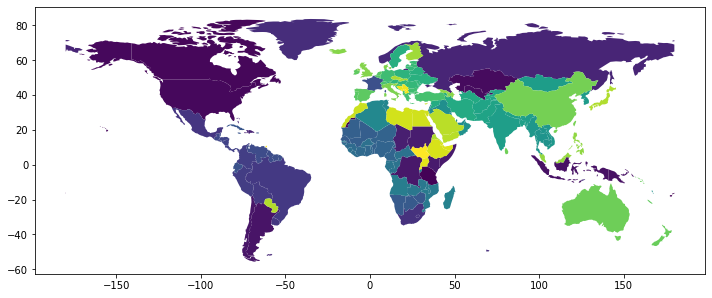

In [ ]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='color', figsize=(12,12))

## ¿Can you paint the above map with a pre-defined number of color, for example *4*?
---


In [ ]:
colors = [chr(27)+f"[0;{str(i)}m" for i in range(40, 47)]
colors.extend([chr(27)+f"[0;{str(i)}m" for i in range(30, 37)])
colors.extend([chr(27)+f"[0;{str(i)}m" for i in range(90, 98)])
colors.extend([chr(27)+f"[0;{str(i)}m" for i in range(100, 107)])

In [ ]:
def color_matrix(n, colors_):
    marks = np.zeros((n, n))
    marks -= 1
    for i in range(n):
        for j in range(n):
            i_ = np.random.randint(len(colors_))
            marks[i, j] = i_

            while ((i > 0 and marks[i, j] == marks[i-1, j]) or
                (i < n-1 and marks[i, j] == marks[i+1, j]) or
                (j > 0 and marks[i, j] == marks[i, j-1]) or
                (j < n-1 and marks[i, j] == marks[i, j+1])):
                i_ = np.random.randint(len(colors_))
                marks[i, j] = i_

            print(f"{colors_[i_]} {i_} ", end='')
        print()

In [ ]:
color_matrix(10, colors[:2])

 1  0  1  0  1  0  1  0  1  0 
 0  1  0  1  0  1  0  1  0  1 
 1  0  1  0  1  0  1  0  1  0 
 0  1  0  1  0  1  0  1  0  1 
 1  0  1  0  1  0  1  0  1  0 
 0  1  0  1  0  1  0  1  0  1 
 1  0  1  0  1  0  1  0  1  0 
 0  1  0  1  0  1  0  1  0  1 
 1  0  1  0  1  0  1  0  1  0 
 0  1  0  1  0  1  0  1  0  1 
